In [496]:
import tensorflow as tf
from tensorflow.contrib import rnn
import matplotlib.pyplot as plt
import numpy as np

In [497]:
tf.reset_default_graph()
training_rate=0.001
training_iters=10000
batchsize=10
displaystep=200
total_examples=1000

n_input=15 
n_steps=1
n_hidden=128
n_classes=15   

x=tf.placeholder("float",[None,n_steps,n_input])
#y=tf.placeholder("float",[None,n_classes])

weights ={
    #'hidden':tf.Variable(tf.random_normal([n_input,n_hidden])),
    'out':tf.Variable(tf.random_normal([n_hidden,n_classes]))
}
biaes={
    #'hidden':tf.Variable(tf.random_normal([n_hidden])),
     'out':tf.Variable(tf.random_normal([n_classes]))
}
x.shape

TensorShape([Dimension(None), Dimension(1), Dimension(15)])

In [498]:
def RNN (x,weights,biaes):
    #x=tf.unstack(x,n_steps,1)
    lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    outputs, states=tf.nn.dynamic_rnn(lstm_cell,x,dtype=tf.float32)
    outputs=tf.transpose(outputs, [1, 0, 2])[-1]
    print (outputs.shape)
    #x.shape
    out= tf.matmul(outputs,weights['out'])+biaes['out']
    print("rnn out",out.shape)
    return out

In [499]:
def gen_num():
    np.random.seed(10)
    a=np.random.randint(0,100,(1,1,15))
    a=np.array(a,dtype=np.float32)
    return a

[[  4.   2.   3.   6.   5.   8.  10.   9.  13.  17.  19.  20.  22.  17.
   15.]]
(1, 15)


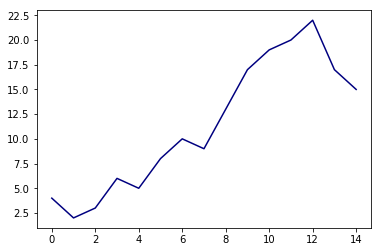

In [500]:
%matplotlib inline
data=[[4,2,3,6,5,8,10,9,13,17,19,20,22,17,15]]
data = np.array(data, dtype=np.float32)
print (data)
print(data.shape)
plt.plot(data[0],color='navy')

In [501]:
logits= RNN(x,weights,biaes)
#prediction=tf.nn.softmax(logits)
print("prediction shape ",prediction.shape)

loss_op = tf.losses.mean_squared_error(data,logits)

optimizer= tf.train.AdamOptimizer(learning_rate=training_rate)
train_op = optimizer.minimize(loss_op)

init=tf.global_variables_initializer()

(?, 128)
rnn out (?, 15)
prediction shape  (?, 15)


In [502]:
trainEpochs=100
#totalBatches=int(total_examples/batchsize) #1000/10=100
loss_list=[];epoch_list=[];acc_list=[]
#print ("total num= ",totalBatches)
from time import time
startTime=time()

sess=tf.Session()
sess.run(tf.global_variables_initializer())

<IPython.core.display.Javascript object>


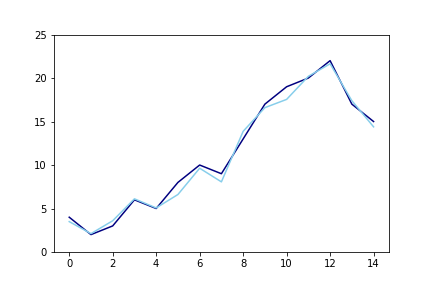

Loss=  0.329675
Trained Finished takes: 0.8186001777648926


<IPython.core.display.Javascript object>


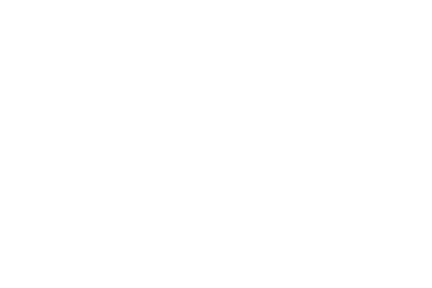

In [503]:
%matplotlib notebook
fig=plt.figure()
ax=fig.add_subplot(111)
line1, = ax.plot(data[0],color='navy')
line2, = ax.plot(data[0]*0.5,color='skyblue')
plt.ylim((0,25))
plt.ion()
plt.show()

a=gen_num()
#print("a= ",a)

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(trainEpochs):
            
        sess.run(train_op,feed_dict={x:a})
        loss = sess.run(loss_op, feed_dict={x:a})
        epoch_list.append(epoch)
        loss_list.append(loss)

        
        if epoch%10==0:
            test_pred=sess.run(logits,feed_dict={x:a})
            line2.set_ydata(test_pred.reshape(-1,1))
            fig.canvas.draw()   
print( "Loss= " ,loss)            
duration= time()-startTime
print ("Trained Finished takes:" , duration)

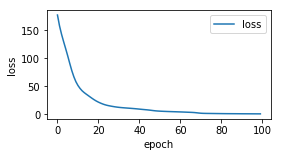

In [504]:
%matplotlib inline
fig=plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper right')